<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

##Autores: [Neisser Pino R.](https://scholar.google.com.pe/citations?user=pAB28NEAAAAJ&hl=es), [Ricardo Quispe M.](https://github.com/RcrdPhysics)
##Institución: Universidad Nacional Mayor de San Marcos
##Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Sesión 4. Integración numérica
<p align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSodclC6zEzEI3sZfBLMXbdF_ZWSS-aQOyrQA&usqp=CAU"  width=55% />
</p>


## Outline
1. Punto Medio
2. Cuadratura
3. Regla del Trapecio
4. Regla de Simpson
5. Integrando con SciPy
6. Problema físico

A menudo es necesario evaluar la integra definida de una función que no tiene una antiderivada explícita, o cuya antiderivada no es fácil de obtener. El método básico con el que se aproxima $\int_a^b f(x)dx$ recibe el nombre de **cuadratura numérica** y emplea una suma del tipo: 


$$ \sum_{t=0}^n a_if(x_i)$$


<p align="center">
  <img src="https://dl.dropboxusercontent.com/s/baf7eauuwm347zk/integracion_numerica.png?dl=0"  width=75% />
</p>




## 1. Punto medio

En el método del punto medio, construimos un rectángulo para cada subintervalo donde la altura es igual a f en el punto medio del subintervalo. Ahora derivamos la fúrmula del punto medio basado en n rectángulos de igual tamaño:

\begin{align}
\int_a^b f(x)\,dx &= \int_{x_0}^{x_1} f(x)dx + \int_{x_1}^{x_2} f(x)dx +
                     \ldots + \int_{x_{n-1}}^{x_n} f(x)dx,     \nonumber \\ 
                  &\approx h f\left(\frac{x_0 + x_1}{2}\right) +
                   h f\left(\frac{x_1 + x_2}{2}\right) + \ldots +
                   h f\left(\frac{x_{n-1} + x_n}{2}\right) ,
 \\ 
                  &\approx h \left(f\left(\frac{x_0 + x_1}{2}\right) +
                  f\left(\frac{x_1 + x_2}{2}\right) + \ldots +
                  f\left(\frac{x_{n-1} + x_n}{2}\right)\right)\thinspace .

\end{align}

Esta suma puede ser escrita de manera compacta de la siguiente forma:

$$\int_a^b f(x)d(x) \approx h\sum_{i=0}^{n-1}f(x_i)$$

donde $x_i = \left(a + \frac{h}{2}\right) + ih$

In [ ]:
def midpoint(f, a, b, n):
    h = round(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

In [ ]:
def ee(x):
  return np.exp(-x**2)

midpoint(ee,0,2,n)

0.8842000076332692

In [ ]:
print('    n        punto medio')
for i in range(1, 21):
    n = 2**i
    m = midpoint(ee, a, b, n)
    print('%7d %.16f' % (n, m))

    n        punto medio
      2 0.7545979437721995
      4 0.7487471318910093
      8 0.7473035787307479
     16 0.7469439125163669
     32 0.7468540726233615
     64 0.7468316174454078
    128 0.7468260039506870
    256 0.7468246005957426
    512 0.7468242497581773
   1024 0.7468241620488596
   2048 0.7468241401215338
   4096 0.7468241346397010
   8192 0.7468241332692467
  16384 0.7468241329266309
  32768 0.7468241328409762
  65536 0.7468241328195626
 131072 0.7468241328142037
 262144 0.7468241328128770
 524288 0.7468241328125576
1048576 0.7468241328124761


## 2. Cuadratura

Los métodos de cuadratura en esta sección se basan en los polinomios de interpolación
que se fueron explicados en la sesión 3. La idea básica es seleccionar un conjunto de nodos
distintos $\{x0,... , xn\}$ del intervalo $[a, b]$. 

Entonces integramos el polinomio interpolante de
Lagrange

$$P_n(x)=\sum_{i=0}^n f(x_i)L_i(x)$$

y sumo su término de error de truncamiento sobrea $[a,b]$ para obtener

$$\int_a^bf(x)dx=\int_a^b \sum_{i=0}^nf(x_i)L_i(x)dx + \int_a^b \prod_{i=0}^n(x-x_i)\frac{f^{(n+1)}\xi(x)}{(n+1)!}dx$$

$$\int_a^bf(x)dx=\sum_{i=0}^na_if(x_i)+ \frac{1}{(n+1)!}  \int_a^b \prod_{i=0}^n(x-x_i)f^{(n+1)}\xi(x)dx$$

donde $\xi(x)$ se encuentra en $[a, b]$ para cada $x $

$$a_i=\int_a^bL_i(x)dx$$
para cada $i = 0,1,\dots,n.$

La fórmula de cuadratura es, por lo tanto,

$$\int_a^b f(x)dx \approx \sum_{i=0}^na_if(x_i)$$

con un error dado por:

$$E(f)=\frac{1}{(n+1)!}\int_a^b\prod_{i=0}^n(x-x_i)f^{(n+1)}(\xi(x))dx$$

Consideremos las
fórmulas producidas mediante el uso del primer y del segundo polinomios de Lagrange con
nodos igualmente espaciados. Esto da la **regla trapezoidal** y la **regla de Simpson**, las cuales
se presentan generalmente en cursos de cálculo.

## 3. Regla trapezoidal

Para derivar la regla trapzoidal (o regla del trapecio) para aproximar $\int_a^bf(x)dx$. sean $x_0=a$,$x_1=b$,$h=b-a$ y utilizando el polinomio de Lagrange

$$P_1(x)=\frac{(x-x_1)}{x_0-x_1}f(x_0)+\frac{(x-x_0)}{x_1-x_0}f(x_1)$$

$$\int_a^bf(x)dx=\int_{x_0}^{x_1}\left[\frac{(x-x_1)}{(x_0-x_1)} f(x_0)+\frac{(x-x_0)}{(x_1-x_0)} f(x_1)\right]dx +\frac{1}{2}\int_{x_0}^{x_1} f''(\xi(x))(x-x_0)(x-x_1)dx$$

obteniendo:

$$\int_a^bf(x)dx=\left[\frac{(x-x_1)^2}{2(x_0-x_1)} f(x_0)+\frac{(x-x_0)^2}{2(x_1-x_0)} f(x_1)\right]_{x_0}^{x_1}-\frac{h^3}{12}f''(\xi)$$

$$=\frac{(x_1-x_0}{2}[f(x_0)+f(x_1)]-\frac{h^3}{12}f''(\xi)$$.

Haciendo $h=x_1-x_0$ obtenemos la **regla trapezoidal**:

$$\int_a^bf(x)dx=\frac{(x_1-x_0)}{2}[f(x_0)+f(x_1)]-\frac{h^3}{12}f''(\xi)$$

Esto recibe el nombre de regla trapezoidal porque cuando $f$ es una función con valores positivos, la integral se aproxima mediante el área de un trapecio, como se muestra en el siguiente esquema

<p align="center">
  <img src="
https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Trapezoidal_rule_illustration_small.svg/440px-Trapezoidal_rule_illustration_small.svg.png"  width=45% />
</p>



El término de error para la regla trapezoidal implica $f''$, por lo que la regla da el resultado
exacto cuando se aplica a cualquier función cuya segunda derivada es idénticamente cero, es
decir, cualquier polinomio de grado uno o menos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#define a function to do integration of f(x) btw. 0 and 1:
def trap(f,a,b,n):
    h = 1 / float(n)
    intgr = 0.5 * h * (f(a) + f(b))
    for i in range(1, int(n)):
        intgr = intgr + h * f(i * h) 

    #error_trapecio = (b-a)*(h^2)/12
    return intgr

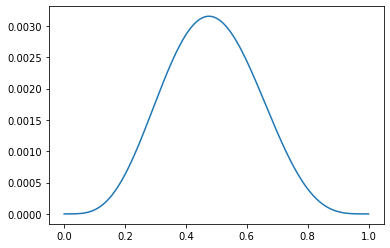

In [ ]:
a=0
b=1
h=1e-8
N=(b-a)/h
#the function to be integrated:
def f(x):
    return x**4 * (1 - x)**4 / (1 + x**2)

x=np.linspace(a,b,int(N))
plt.plot(x,f(x))

In [ ]:
print(trap(f,a,b,100))

0.0012644892673714441


In [ ]:
np.trapz(f(x),dx=h) #comprobando con el trapecio de NumPy

0.0012644892547047253

In [ ]:
n_l=[]#n's_list
t_l=[]#trapz_list
print('    n        trapecio')
for i in range(1, 21):
    n = 2**i
    t = trap(f, a, b, n)
    t_l.append(t)
    n_l.append(n)
    print('%7d %.16f' % (n, t))

    n        trapecio
      2 0.4409770268935514
      4 0.3989931289496741
      8 0.3806097629734309
     16 0.3721482637411141
     32 0.3681149165193379
     64 0.3661502929250893
    128 0.3651814757074172
    256 0.3647005262820066
    512 0.3644609315069255
   1024 0.3643413567818143
   2048 0.3642816255583611
   4096 0.3642517740651184
   8192 0.3642368518629149
  16384 0.3642293916505345
  32768 0.3642256617669869
  65536 0.3642237968809556
 131072 0.3642228644518898
 262144 0.3642223982408486
 524288 0.3642221651361958
1048576 0.3642220485841018


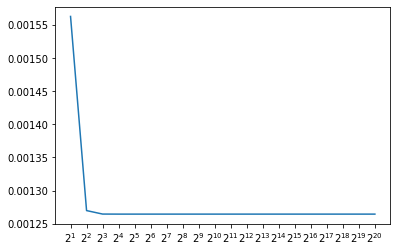

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.set_xscale('symlog', basex=2)
#ax.set_yscale('symlog', basey=2)

#x = np.arange(-1024, 1024)
ax.plot(n_l, t_l)

plt.show()

## 4. Regla de Simpson

La regla de Simpson resulta de la integración sobre $[a,b]$ del segundo polinomio de Lagrange con nodos igualmente espaciados.

<p align="center">
  <img src="
https://habrastorage.org/webt/-m/ev/xq/-mevxq8y8s8nkt8nlfwg1vpltua.png"  width=55% />
</p>

El cual resulta en dos formas de métodos: **Regla  de Simpson 1/3** y **3/8**.

#### **Regla de Simpson 1/3**

$$\int_{x_0}^{x_2}f(x)dx  = \frac{h}{3}[f(x_0) +4f(x_1)+f(x_2)]-\frac{h^5}{90}f^{(4)}(\xi)$$

$x_0=a$,$x_2=b$, y $x_1=a+h$, en donde $h=(b-a)/n$

El término de error en la regla de Simpson implica la cuarta derivada de $f$, por lo que da
resultados exactos cuando se aplica a cualquier polinomio de grado tres o menos

$$\int_{x_0}^{x_2}f(x)dx  = \frac{h}{3}[f(x_0) +4\sum_{i=1}^{n/2}f(x_0+x1)+2\sum_{i=1}^{\frac{n}{2}-1}f(x_0 + x1)+f(x_2)]$$

In [ ]:
def simpson1_3(f, a, b, n):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = 0.0
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la x
        #x: valores entre [a,b] espaciados por h
        x = a + i * h
        # si es par se multiplica por 4
        if(i % 2 == 0): # i%2 : evalúa si "i" es divisible entre 2 el resultado es 0 (residuo de la división)
            suma = suma + 2 * f(x)
            #o
            #suma += 2* f(x,f)
        #en caso contrario se multiplica por 2
        else:
            suma = suma + 4 * f(x)
    #sumamos los el primer elemento y el ultimo
    suma = suma + f(a) + f(b)
    #Multiplicamos por h/3
    area = suma * (h / 3)

    #error_simpson1 = (h^5)/90
    #Retornamos el resultado
    return area

Área: 2.0536301324701354


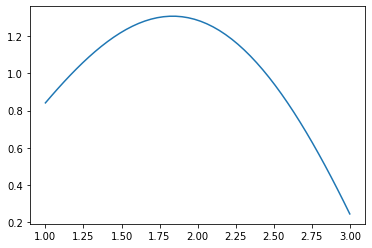

In [ ]:
# Integración: Regla Simpson 1/3
import numpy as np
import matplotlib.pyplot as plt

# INGRESO:
def f(x):
  return np.sqrt(x)*np.sin(x)

# intervalo de integración [a,b] con  n pasos
a = 1
b = 3

n = 50

print('Área:',simpson1_3(f,a,b,n))
x=np.linspace(a,b,n)
plt.plot(x,f(x))

In [ ]:
s13_l=[]#trapz_list
print('      n        trapecio')
for i in range(1, 21):
    n = 2**i
    s13 = simpson1_3(f, a, b, n)
    s13_l.append(s13)
    print('%7d %.16f' % (n, s13))

      n        trapecio
      2 2.0765536739078203
      4 2.0549261957703937
      8 2.0537093830617339
     16 2.0536350132810970
     32 2.0536303887412357
     64 2.0536301000609343
    128 2.0536300820238713
    256 2.0536300808966383
    512 2.0536300808261894
   1024 2.0536300808217902
   2048 2.0536300808215113
   4096 2.0536300808214878
   8192 2.0536300808214918
  16384 2.0536300808214918
  32768 2.0536300808214745
  65536 2.0536300808215007
 131072 2.0536300808215189
 262144 2.0536300808215286
 524288 2.0536300808214101
1048576 2.0536300808215957


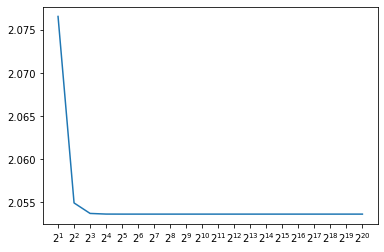

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.set_xscale('symlog', basex=2)
# Create scale bar
#ax.set_yscale('symlog', basey=2)

#x = np.arange(-1024, 1024)
ax.plot(n_l, s13_l)

plt.show()

#### **Regla de Simpson 3/8**

Es el resultado cuando para el integral se utiliza el resultado de una interpolación con polinomio de tercer grado.

$$\int_a^bf(x)dx=\frac{3h}{8}[f(x_0)+3f(x_1)+3f(x_2)+f(x_3)] - \frac{3}{80}h^5f^{(4)}(z)$$

Donde $f^{(4)}(z) = \frac{d^4f}{dz^4}$.

Usando múltiples segmentos (n), se requiere un número de segmentos múltiplos de 3.

En forma discreta sería:

$$\int_a^bf(x)dx \approx \frac{3h}{8}\sum_{i}^{n/3}\left[ f(x_0)+ 3f(x_1)+2f(x_1) +f(x_2) \right]$$

In [ ]:
def simpson3_8(f, a, b, n):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = f(a)+f(b)
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la k
        #k = a - h + (2 * h * i)
        k = a + i * h

        if (i % 3 == 0): # i%3 : evalúa si "i" es divisible entre 3 el resultado es 0 (residuo de la división)
          suma += 2 * f(k)

        #en caso contrario se multiplica por 3
        else:
          suma += 3*f(k)
              
    #Multiplicamos por 3h/8
    area = suma * 3*(h / 8)

    #error_simpson2 = (b-a)*(h^4)/180
    #Retornamos el resultado
    return area

Área: 17.367255213829846 17.36725536267093


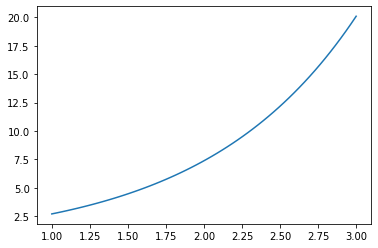

In [ ]:
# Integración: Regla Simpson 3/8
import numpy as np
import matplotlib.pyplot as plt

# INGRESO:
def f2(x):
  return np.exp(x)#*np.sin(x)

# intervalo de integración [a,b] con  n pasos
a = 1
b = 3

n = 60

print('Área:',simpson1_3(f2,a,b,n),simpson3_8(f2,a,b,n))
x=np.linspace(a,b,n)
plt.plot(x,f2(x))

In [ ]:
s38_l=[]#simpson3/8_list
print('      n        trapecio')
for i in range(1, 21):
    n = 2**i
    s38 = simpson3_8(f, a, b, n)
    s38_l.append(s38)
    print('%7d %.16f' % (n, s38))

      n        trapecio
      2 1.8538951006783593
      4 1.9689911188603215
      8 2.0332245095260708
     16 2.0426907919621136
     32 2.0509074532712077
     64 2.0515156369169461
    128 2.0531016644332376
    256 2.0531399047008629
    512 2.0535075398501217
   1024 2.0535099333455231
   2048 2.0536000440003659
   4096 2.0536001936478314
   8192 2.0536226090288219
  16384 2.0536226183826138
  32768 2.0536282152118002
  65536 2.0536282157964165
 131072 2.0536296145652333
 262144 2.0536296146017525
 524288 2.0536299642666105
1048576 2.0536299642688087


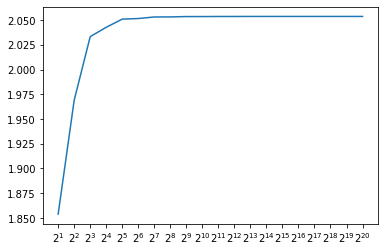

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('symlog', basex=2)
# Create scale bar
#ax.set_yscale('symlog', basey=2)

#x = np.arange(-1024, 1024)
ax.plot(n_l, s38_l)

plt.show()

## Método de Romberg

En análisis numérico, el Método de Romberg genera una matriz triangular cuyos elementos son estimaciones numéricas de la integral definida siguiente:

${\displaystyle \int _{a}^{b}f(x)\,dx}$ 

usando la extrapolación de Richardson de forma reiterada en la regla del trapecio. El método de Romberg evalúa el integrando en puntos equiespaciados del intervalo de integración estudiado. Para que este método funcione, el integrando debe ser suficientemente derivable en el intervalo, aunque se obtienen resultados bastante buenos incluso para integrandos poco derivables. 

### Método
$$
\int_a^bf(x) dx={\displaystyle R(n,m)={\frac {1}{4^{m}-1}}(4^{m}R(n,m-1)-R(n-1,m-1))}
$$

donde:

$n \geq 1$

$m \geq 1$

$h_n=\frac{b-a}{2^n}$



In [ ]:
def print_row(lst):
    print(' '.join('%11.8f' % x for x in lst))

def romberg(f, a, b, eps = 1E-8):
    """Approximate the definite integral of f from a to b by Romberg's method.
    eps is the desired accuracy."""
    R = [[0.5 * (b - a) * (f(a) + f(b))]]  # R[0][0]
    print_row(R[0])
    n = 1
    while True:
        h = float(b-a)/2**n
        R.append((n+1)*[None])  # Add an empty row.
        R[n][0] = 0.5*R[n-1][0] + h*sum(f(a+(2*k-1)*h) for k in range(1, 2**(n-1)+1)) # for proper limits
        for m in range(1, n+1):
            R[n][m] = R[n][m-1] + (R[n][m-1] - R[n-1][m-1]) / (4**m - 1)
        print_row(R[n])
        if abs(R[n][n-1] - R[n][n]) < eps:
            return R[n][n]
        n += 1


In [ ]:
def f3(t):
  return 2/ np.sqrt(np.pi)*np.exp(-t*t)

In [ ]:
romberg(f3,0,1)

 0.77174333
 0.82526296  0.84310283
 0.83836778  0.84273605  0.84271160
 0.84161922  0.84270304  0.84270083  0.84270066
 0.84243051  0.84270093  0.84270079  0.84270079  0.84270079


0.8427007932686705

La extrapolación a orden cero ${\displaystyle R(n,0)}$ es equivalente a la Regla del trapecio con ${\displaystyle n+2}$ puntos. a orden uno ${\displaystyle R(n,1)}$ es equivalente a la Regla de Simpson con ${\displaystyle n+2}$ puntos.

## 5. Integrando con SciPy

Integra la función de $a$ a $b$ (posiblemente intervalo infinito) utilizando una técnica de la biblioteca de Fortran QUADPACK.

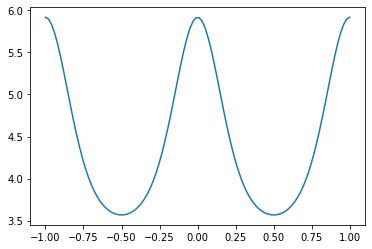

In [ ]:
from scipy.integrate import quad

def f(x):
    return np.exp(np.cos(-2 * x * np.pi)) + 3.2
x=np.linspace(-1,1,100)
plt.plot(x,f(x))

In [ ]:
# integrando de -2 a 2
res, err = quad(f, -2, 2) #devuelve respuesta y error

print("El resultado numérico es {}, con un error de {}"
    .format(res, err))

El resultado numérico es 17.864263511008033, con un error de 1.5511700537796237e-11


## 6. Problema Físico


#### Distribución de Fermi-Dirac
La distribución de Fermi-Dirac (FD) describe la probabilidad de encontrar una partícula cuántica con spin semi-entero $(1/2,3/2,...)$ en el estado de energía E:

$$f_{FD}=\frac{1}{e^{(E-\mu)/kT}+1}$$

El $\mu$ en la distribución de FD es llamado la **energía de Fermi**, y en este caso queremos ajustar $\mu$, tal que la probabilidad de hallar una partícula en punto sea exactamente 1.

$$\int_{E_{min}}^{E_{max}}f_{FD}dE=1$$


Imagine un sistema cuántico a temperatura ambiente donde, por alguna razón, la energía E está limitada a estar entre 0 y 2 eV. ¿Cuál sería el $\mu$ en este caso?

In [ ]:
def fd_E(E,mu=1):
  kT=1/40 #eV
  #E=1.5 #kelvin
  #mu=1
  return (1/(np.exp((E-mu)/kT)+1))

Text(0.5, 1.0, '$f_{FD}$')

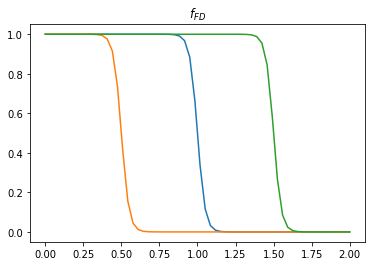

In [ ]:
import matplotlib.pyplot as plt
a=0
b=2
x=np.linspace(a,b,n)

plt.plot(x,fd_E(x))
plt.plot(x,fd_E(x,0.5))
plt.plot(x,fd_E(x,1.5))
plt.title('$f_{FD}$')

In [ ]:
a=0
b=2
n=100
simpson3_8(fd_E,a,b,n)

1.0000091105630406

In [ ]:
quad(fd_E,a,b) 

(1.0, 1.1102230246251565e-14)

La energía de Fermi es la energía del nivel más alto ocupado por un sistema cuántico a temperatura nula (0 K).

#### Potencial eléctrico producido por una varilla cargada

<p align="center">
  <img src="
https://habrastorage.org/webt/ln/h0/qq/lnh0qqiz4vzrhuwqmlxaelelnty.png"  width=55% />
</p>

Una varilla finita en el dominio $[a,b]$ con distribución de carga $\lambda(x)$ (carga por unidad de longitud). ¿Cuál es el potencial a una altura $z=d$ en $x=0$?

$$V=\int\frac{kdq}{r}$$

sabemos que $dq=\lambda dx$ y $r=\sqrt{x^2+d^2}$

$$V=\int_{a}^{b}\frac{k\lambda dx}{\sqrt{x^2+d^2}}$$

Cuya solución analítica es:

$$V=k\lambda ln\left[ \frac{b+\sqrt{b^2+d^2}}{-a+\sqrt{a^2+d^2}} \right]$$

In [ ]:
lambd=0.5
k=1
d=100
def v_sol(d):
  return k*lambd*np.log((b+np.sqrt(b**2+d**2))/(-a+np.sqrt(a**2+d**2)))

In [ ]:
def argumento(x,lambd=0.5, k=1, d=100):
  
  return k*lambd/(np.sqrt(x**2+d**2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Text(0, 0.5, 'V(d)')

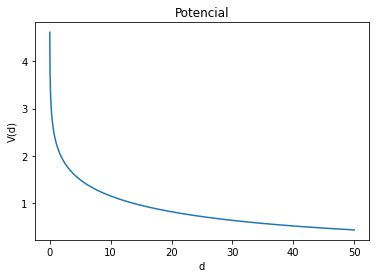

In [ ]:
a=1e-4#-2
b=50#2
h=1e-2
n=round((b-a)/h)
distancias=np.linspace(a,b,n)
plt.plot(x,v_sol(x)) #Potencial vs distancia
plt.title('Potencial')
plt.xlabel('d')
plt.ylabel('V(d)')

In [ ]:
print('El potencial provocado por una varilla de longitud |b-a| es:', simpson3_8(argumento,a,b,n),'\n propio')

El potencial provocado por una varilla de longitud |b-a| es: 0.24060032213625435 
 propio


In [ ]:
print('El potencial provocado por una varilla de longitud |b-a| es:',np.trapz(argumento(x),dx=h),'\n NumPy') #siempre darle el mismo 8 con el que se está usando en Simpson

El potencial provocado por una varilla de longitud |b-a| es: 0.24055779119819476 
 NumPy


In [ ]:
print('El potencial provocado por una varilla de longitud |b-a| es:',k*lambd*np.log((b+np.sqrt(b**2+d**2))/(-a+np.sqrt(a**2+d**2))),'\n NumPy') 


El potencial provocado por una varilla de longitud |b-a| es: 0.24060641252980172 
 NumPy


**Integracion adapatativa o Cuadratura adaptable**

Las fórmulas compuestas son muy efectivas en muchas situaciones, pero ocasionalmente sufren porque requieren el uso de nodos igualmente espaciados. Esto es inadecuado al integrar
una función sobre un intervalo que contiene ambas regiones con gran variación funcional y regiones con variación funcional pequeña.

Veremos que en ciertas condiciones razonables, podemos responder esta pregunta y también determinar aproximaciones que satisfacen requisitos de precisión determinados.

Si el error de aproximación para una integral en un intervalo determinado está distribuido de manera equitativa, se necesita un tamaño de paso más pequeño para las grandes regiones de variación que para aquellas con menos variación.

Una técnica para este tipo de problema debería predecir la cantidad de variación funcional y adaptar el tamaño de
paso conforme sea necesario. Estos métodos reciben el nombre de métodos de **cuadratura adaptable**.

El procedimiento listado en el algoritmo, primero aproxima la integral en el subintervalo sitúado más a la izquierda en una subdivisión. Esto requiere almacenamiento eficiente y recordar las evaluaciones funcionales que se han calculado antes para los nodos en los
subintervalos situados a la mitad derecha. Luego estas operaciones contienen un procedimiento de apilamiento con un indicador para seguir los datos requeridos para calcular la aproximación
en el subintervalo inmediatamente adyacente y a la derecha del subintervalo en el que se genera la aproximación. El método es más fácil de implementar por medio de lenguaje de programación recursivo.

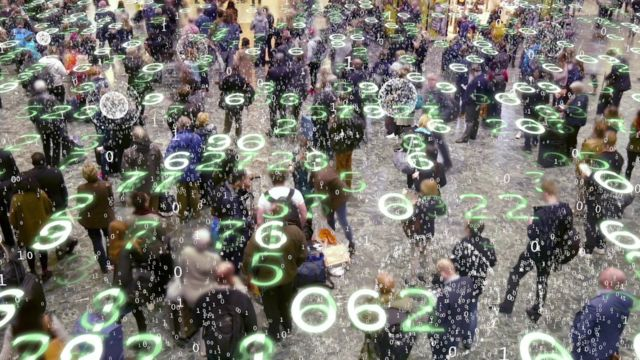

# 7. Resumen


La crítica a las fórmulas compuestas que utilizan
nodos equidistantes, es que al integrar una función en
un intervalo que contiene regiones, donde la función
varía en gran medida, y en otras en donde la variación
es pequeña, no es factible su aplicación. 

Cuando la estimación del error no es válida, se aplica la regla de Simpson a los nuevos subintervalos, teniendo en
consideración que los errores parciales de cada
intervalo, corresponden a la mitad del error anterior.

Los algoritmos que se realiza se basa en el esquema del trapecio refinado, hace uso de la filosofía de Richardson, y ha demostrado en la
práctica producir resultados precisos en las evaluaciones de integrales, utilizando pocas iteraciones y con errores pequeños.

La producción de resultados precisos en integración
numérica, con errores muy pequeños, trae consigo el
aumento de evaluaciones.

La utilización de la recursividad hace posible construir
buenos algoritmos en **integración adaptativa**. Con la
técnica del Divide y Vencerás, se ha obtenido un
algoritmo que da resultados precisos, en el menor
tiempo.

## 8. Recursos útiles

* ["Simpson 1/3"](https://www.freecodecamp.org/news/simpsons-rule/#:~:text=Simpson%27s%203%2F8%20rule%20states,a%20and%20xn%20%3D%20b.)
* ["Simpson 3/8"](http://mathforcollege.com/nm/mws/gen/07int/mws_gen_int_txt_simpson3by8.pdf)
* Richard L. Burden, 'Analisis Numerico', 10ma Edición
* Eric Ayars , 'Computational Physics with Python" (libro completo [aquí](https://belglas.files.wordpress.com/2018/03/cpwp.pdf))
* ["How to Think Like a Computer Scientist"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - Think Python Versión 2.0.17 by Allen Doney. (libro completo [aquí](https://www.greenteapress.com/thinkpython/thinkpython.pdf))
* Richardson, L. F. (1911), "The Approximate Arithmetical Solution by Finite Differences of Physical Problems Involving Differential Equations, with an Application to the Stresses in a Masonry Dam", Philosophical Transactions of the Royal Society of London. Series A 210: pp. 307-357
* [Método de Romber](https://es.wikipedia.org/wiki/Método_de_Romberg)

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>